# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# base_url = f'https://api.openweathermap.org/data/3.0/onecall?'
api_key = weather_api_key 
units = 'metric'
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# to add onto url: f'lat={lat}&lon={lon}&exclude={part}&appid={API key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{base_url}appid={api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(query_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | saint-felicien
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | haiku-pauwela
Processing Record 8 of Set 1 | praia da vitoria
Processing Record 9 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 10 of Set 1 | buritis
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | dalandzadgad
Processing Record 13 of Set 1 | yuzhno-kurilsk
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | fale old settlement
Processing Record 16 of Set 1 | ulladulla
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | ixtapa
Processing Record 19 of Set 1 | bodden town
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | 

Processing Record 38 of Set 4 | kota kinabalu
Processing Record 39 of Set 4 | lakatoro
Processing Record 40 of Set 4 | cascais
Processing Record 41 of Set 4 | buala
Processing Record 42 of Set 4 | shagonar
Processing Record 43 of Set 4 | yuriria
Processing Record 44 of Set 4 | afaahiti
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | dunedin
Processing Record 47 of Set 4 | fort mcmurray
Processing Record 48 of Set 4 | sao felix do xingu
Processing Record 49 of Set 4 | constantia
Processing Record 0 of Set 5 | dudinka
Processing Record 1 of Set 5 | tolanaro
Processing Record 2 of Set 5 | gao
Processing Record 3 of Set 5 | dancu
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | soio
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | petropavlovsk-kamchatsky
Processing Record 10 of Set 5 | callao
Processing Record 11 of Set 5 | cidreira
Proc

Processing Record 30 of Set 8 | barsana
Processing Record 31 of Set 8 | jalpan
Processing Record 32 of Set 8 | hadibu
Processing Record 33 of Set 8 | hakui
Processing Record 34 of Set 8 | belyy yar
Processing Record 35 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 36 of Set 8 | kadirli
Processing Record 37 of Set 8 | rundu
Processing Record 38 of Set 8 | sisimiut
Processing Record 39 of Set 8 | cuite
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | mawlaik
Processing Record 42 of Set 8 | takestan
Processing Record 43 of Set 8 | beledweyne
Processing Record 44 of Set 8 | nantucket
Processing Record 45 of Set 8 | hammerfest
Processing Record 46 of Set 8 | salalah
Processing Record 47 of Set 8 | merizo village
Processing Record 48 of Set 8 | cill airne
Processing Record 49 of Set 8 | padmanabhapuram
Processing Record 0 of Set 9 | kaa-khem
Processing Record 1 of Set 9 | paradip garh
Processing Record 2 of Set 9 | xilin hot
Processing Record 

Processing Record 23 of Set 12 | mil'kovo
Processing Record 24 of Set 12 | wakema
Processing Record 25 of Set 12 | myeik
Processing Record 26 of Set 12 | lunavada
Processing Record 27 of Set 12 | chiredzi
Processing Record 28 of Set 12 | mangrol
Processing Record 29 of Set 12 | bouna
Processing Record 30 of Set 12 | bogale
Processing Record 31 of Set 12 | vaasa
Processing Record 32 of Set 12 | tubarjal
Processing Record 33 of Set 12 | nikko
Processing Record 34 of Set 12 | manaure
Processing Record 35 of Set 12 | nhamunda
Processing Record 36 of Set 12 | achacachi
Processing Record 37 of Set 12 | curanilahue
Processing Record 38 of Set 12 | mata-utu
Processing Record 39 of Set 12 | itaberai
Processing Record 40 of Set 12 | nishifukuma
Processing Record 41 of Set 12 | vuktyl
Processing Record 42 of Set 12 | aasiaat
Processing Record 43 of Set 12 | cat ba
City not found. Skipping...
Processing Record 44 of Set 12 | turkmenbasy
Processing Record 45 of Set 12 | carlsbad
Processing Record 4

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,3.81,93,0,1.54,AR,1731558868
1,grytviken,-54.2811,-36.5092,-1.59,81,71,2.02,GS,1731559098
2,hawaiian paradise park,19.5933,-154.9731,22.73,97,100,3.09,US,1731559099
3,margaret river,-33.9500,115.0667,22.47,55,32,7.48,AU,1731559101
4,saint-felicien,48.6501,-72.4491,-6.62,86,0,2.06,CA,1731559102


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

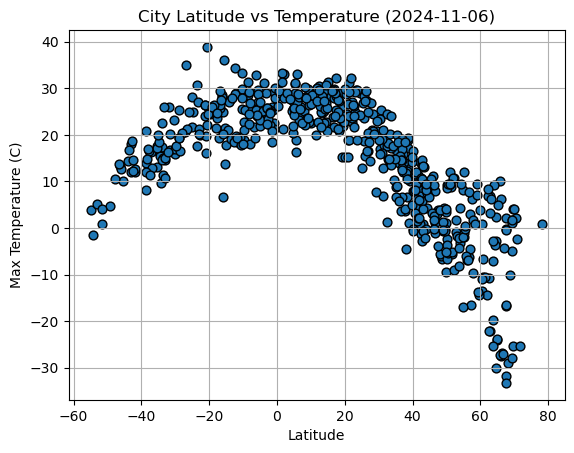

In [7]:
# Build scatter plot for latitude vs. temperature

# x, y data
x_axis = city_data_df['Lat']
data = city_data_df['Max Temp']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")
plt.grid(True)

# Labels
plt.title("City Latitude vs Temperature (2024-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

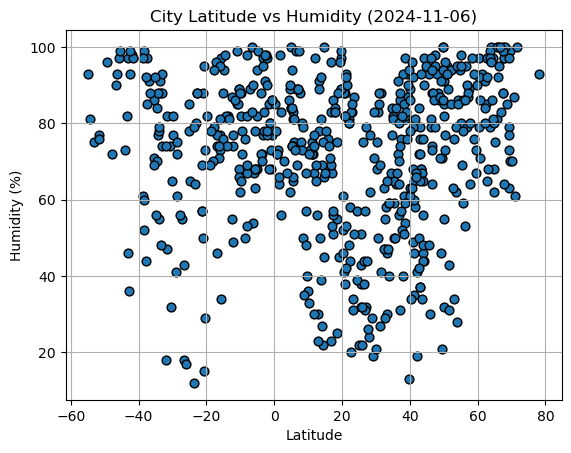

In [8]:
# Build the scatter plots for latitude vs. humidity

# x, y data
x_axis = city_data_df['Lat']
data = city_data_df['Humidity']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")
plt.grid(True)

# Labels
plt.title("City Latitude vs Humidity (2024-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

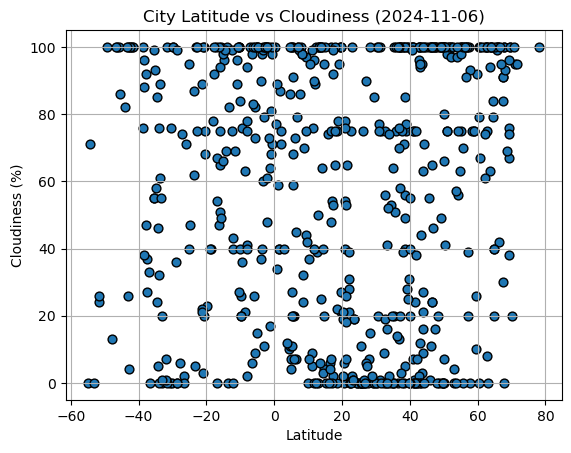

In [9]:
# Build the scatter plots for latitude vs. cloudiness

# x, y data
x_axis = city_data_df['Lat']
data = city_data_df['Cloudiness']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")
plt.grid(True)

# Labels
plt.title("City Latitude vs Cloudiness (2024-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

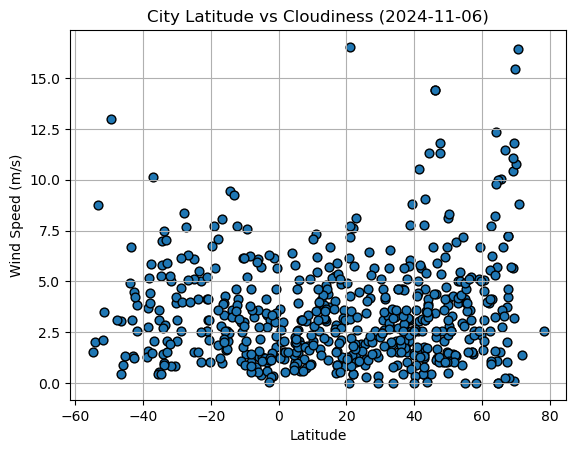

In [10]:
# Build the scatter plots for latitude vs. wind speed

# x, y data
x_axis = city_data_df['Lat']
data = city_data_df['Wind Speed']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")
plt.grid(True)

# Labels
plt.title("City Latitude vs Cloudiness (2024-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots

def lin_reg(x, y):
    # Find slope and intercept of regression line, set linear
    b, a = np.polyfit(x, y, deg=1)
    
    # Plot regression line
    xseq = np.linspace(min(x), max(x))
    plt.plot(xseq, a + b * xseq, color="r")
    
    # Display reg line's equation
    line_eq = "y = " + str(round(b,2)) + "x + " + str(round(a,2))
    x_coord = min(x)
    y_coord = min(y)
    plt.annotate(line_eq,(x_coord, y_coord),fontsize=15,color="red")

    # Calculate and print correlation coefficient
    r = np.corrcoef(x, y)
    r_2 = '{0:.2f}'.format(r[0, 1]**2)
    print(f'The r^2-value is: {r_2}')


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hawaiian paradise park,19.5933,-154.9731,22.73,97,100,3.09,US,1731559099
4,saint-felicien,48.6501,-72.4491,-6.62,86,0,2.06,CA,1731559102
6,haiku-pauwela,20.9219,-156.3051,23.91,88,40,16.54,US,1731559104
7,praia da vitoria,38.7333,-27.0667,17.14,82,75,6.04,PT,1731559105
10,dalandzadgad,43.5708,104.4250,9.00,34,3,3.54,MN,1731559109


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,3.81,93,0,1.54,AR,1731558868
1,grytviken,-54.2811,-36.5092,-1.59,81,71,2.02,GS,1731559098
3,margaret river,-33.9500,115.0667,22.47,55,32,7.48,AU,1731559101
5,port lincoln,-34.7333,135.8667,16.40,56,58,5.25,AU,1731559103
8,buritis,-15.6178,-46.4233,20.76,97,100,1.63,BR,1731559107


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.75


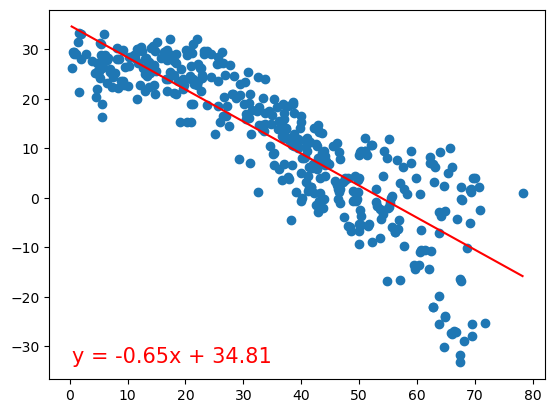

In [14]:
# Linear regression on Northern Hemisphere

# x,y data
lat_data = northern_hemi_df['Lat']
temp_data = northern_hemi_df['Max Temp']

# Create scatterplot
plt.scatter(lat_data, temp_data)

# Add regression line
lin_reg(lat_data, temp_data)

# Display Plot
plt.show()

The r^2-value is: 0.51


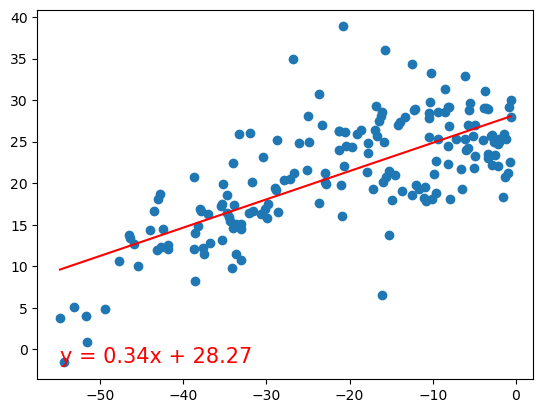

In [15]:
# Linear regression on Southern Hemisphere

# x,y data
lat_data = southern_hemi_df['Lat']
temp_data = southern_hemi_df['Max Temp']

# Create scatterplot
plt.scatter(lat_data, temp_data)

# Add regression line
lin_reg(lat_data, temp_data)

# Display Plot
plt.show()

**Discussion about the linear relationship: 
There is a linear correlation between Latitude and Temperature as seen by the r^2 value of 0.75 in the Northern Hemisphere and 0.51 in the Southern Hemisphere. The Nothern Hemisphere has a higher correlation than the southern. The closer to 0 degrees Latitude a location is, the higher the temperature is, generally. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.06


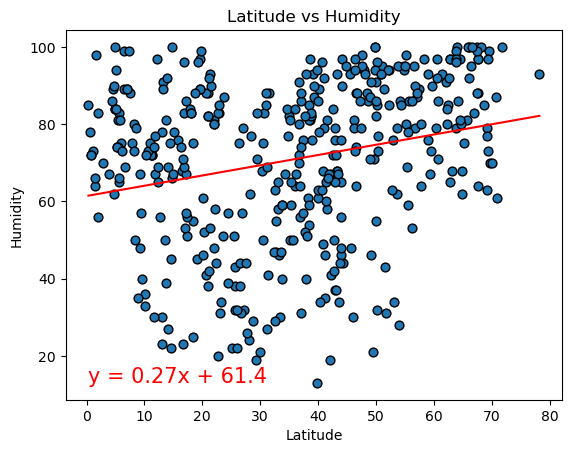

In [16]:
# Northern Hemisphere

# x, y data
x_axis = northern_hemi_df['Lat']
data = northern_hemi_df['Humidity']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")

# Labels
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Regression plots
lin_reg(x_axis, data)
        
plt.show()

The r^2-value is: 0.00


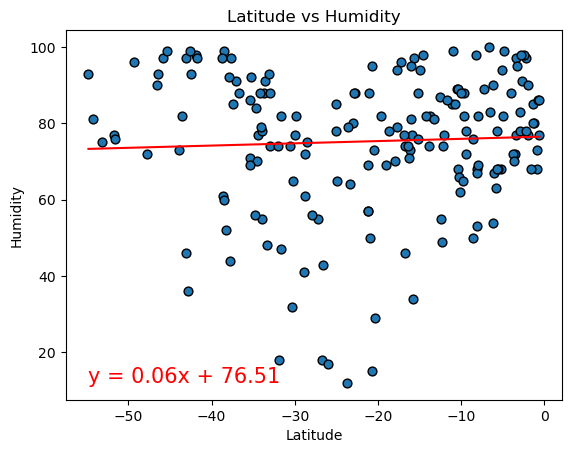

In [17]:
# Southern Hemisphere

# x, y data
x_axis = southern_hemi_df['Lat']
data = southern_hemi_df['Humidity']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")

# Labels
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Regression plots
lin_reg(x_axis, data)
        
plt.show()

**Discussion about the linear relationship:** There is nearly no correlation between latitude and humidity as seen by the correlation coefficients of 0.06 and 0.00 in the northern and southern hemispheres respectively. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.05


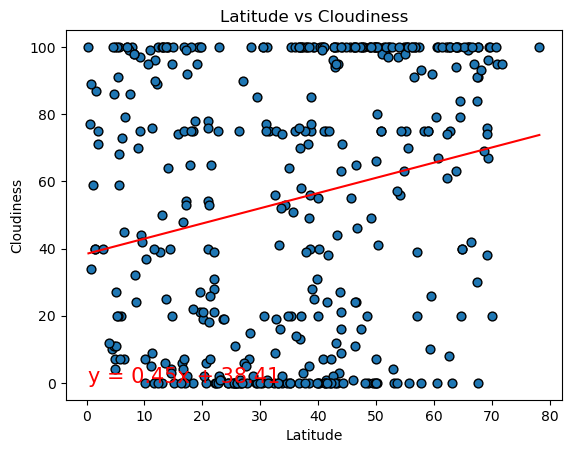

In [18]:
# Northern Hemisphere

# x, y data
x_axis = northern_hemi_df['Lat']
data = northern_hemi_df['Cloudiness']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")

# Labels
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Regression plots
lin_reg(x_axis, data)
        
plt.show()

The r^2-value is: 0.03


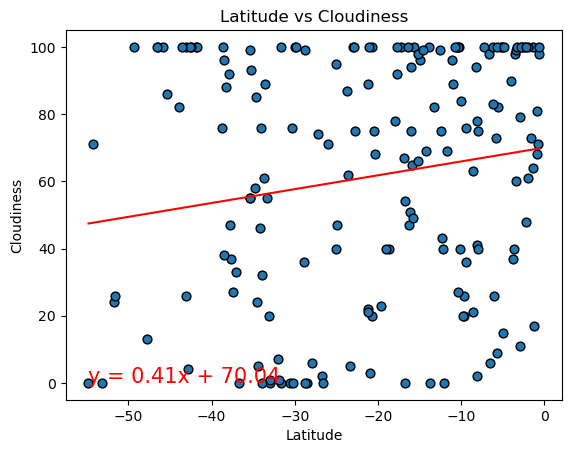

In [19]:
# Southern Hemisphere

# x, y data
x_axis = southern_hemi_df['Lat']
data = southern_hemi_df['Cloudiness']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")

# Labels
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Regression plots
lin_reg(x_axis, data)
        
plt.show()

**Discussion about the linear relationship:** There is nearly no correlation between latitude and cloudiness as seen by the correlation coefficients of 0.05 and 0.03 in the northern and southern hemispheres respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.06


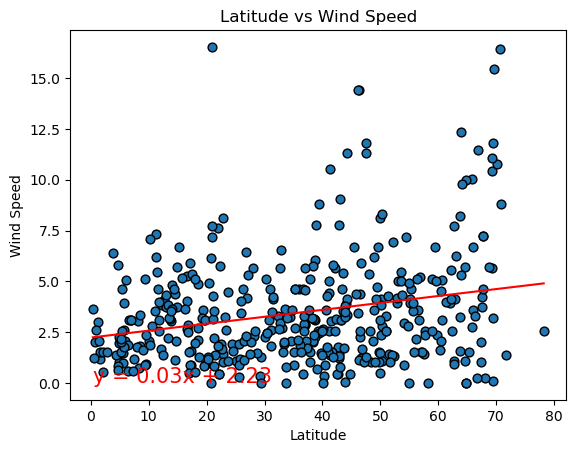

In [20]:
# Northern Hemisphere

# x, y data
x_axis = northern_hemi_df['Lat']
data = northern_hemi_df['Wind Speed']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")

# Labels
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Regression plots
lin_reg(x_axis, data)
        
plt.show()

The r^2-value is: 0.02


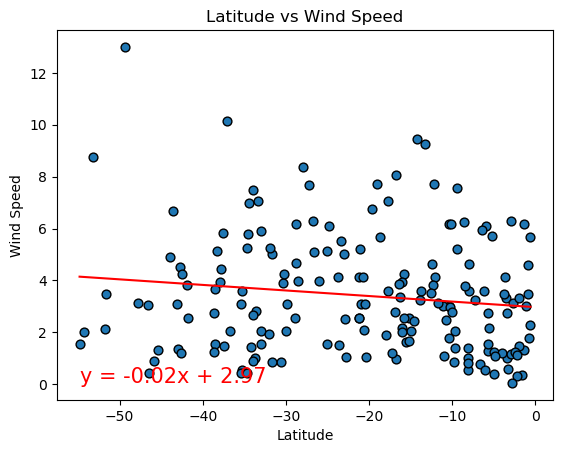

In [21]:
# Southern Hemisphere

# x, y data
x_axis = southern_hemi_df['Lat']
data = southern_hemi_df['Wind Speed']

# Create Scatterplot
plt.scatter(x_axis, data, s=40, edgecolors="black")

# Labels
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Regression plots
lin_reg(x_axis, data)
        
plt.show()

**Discussion about the linear relationship:** There is nearly no correlation between latitude and wind speed as seen by the correlation coefficients of 0.06 and 0.02 in the northern and southern hemispheres respectively. 